In [8]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from parse import *
import seaborn as sns
%matplotlib inline

In [9]:
CHUNKSIZE = 100000

TRAIN_PATH        = "../../data/train_StationPathInfo.csv"
TRAIN_PATH_EX     = "../../data/train_StationPathInfoEx.csv"
TEST_PATH         = "../../data/test_StationPathInfo.csv"
TEST_PATH_EX      = "../../data/test_StationPathInfoEx.csv"
DUPLICATE_FEAT_PATH     = "../../data/Feature_Duplicates.csv"
DUPLICATE_NUM_FEAT_PATH = "../../data/Feature_Numeric_Duplicates.csv"


SEED = 0
CHUNKSIZE = 50000
NROWS = 1200000

ID_COLUMN = 'Id'
TARGET_COLUMN = 'Response'
STATION_NUM = 52
    
    
    

In [10]:
# 読み出す。

df_train_bin = pd.read_csv(TRAIN_PATH, dtype='float32')
df_test_bin  = pd.read_csv(TEST_PATH, dtype='float32')
df_pass = pd.concat([df_train_bin, df_test_bin]).sort_values('Id')


In [11]:
df_pass[df_pass.isnull().any(1)]

,Id,L0_S0_D1,L0_S1_D26,L0_S2_D34,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D137,L0_S8_D145,...,L3_S42_D4029,L3_S43_D4062,L3_S44_D4101,L3_S45_D4125,L3_S46_D4135,L3_S47_D4140,L3_S48_D4194,L3_S49_D4208,L3_S50_D4242,L3_S51_D4255


In [12]:
df_pass.reset_index(drop=True)

,Id,L0_S0_D1,L0_S1_D26,L0_S2_D34,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D137,L0_S8_D145,...,L3_S42_D4029,L3_S43_D4062,L3_S44_D4101,L3_S45_D4125,L3_S46_D4135,L3_S47_D4140,L3_S48_D4194,L3_S49_D4208,L3_S50_D4242,L3_S51_D4255
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
TEST_START_TIME      = "../../data/test_StartEndTime.csv"
TRAIN_START_TIME     = "../../data/train_StartEndTime.csv"

df_start_train = pd.read_csv(TRAIN_START_TIME, dtype='float32')
df_start_train = df_start_train.ix[:,['Id','StartTime','EndTime', 'Response']]
df_start_test = pd.read_csv(TEST_START_TIME, dtype='float32')
df_start_test['Response'] = -1


C:\Users\Tomonobu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [14]:
df_pass[df_pass.isnull().any(1)]

,Id,L0_S0_D1,L0_S1_D26,L0_S2_D34,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D137,L0_S8_D145,...,L3_S42_D4029,L3_S43_D4062,L3_S44_D4101,L3_S45_D4125,L3_S46_D4135,L3_S47_D4140,L3_S48_D4194,L3_S49_D4208,L3_S50_D4242,L3_S51_D4255


In [15]:
df_start_train.head()

,Id,StartTime,EndTime,Response
0,4.0,82.239998,87.290001,0.0
1,6.0,1313.119995,1315.750000,0.0
2,7.0,1618.699951,1624.420044,0.0
3,9.0,1149.199951,1154.160034,0.0
4,11.0,602.640015,606.020020,0.0


In [16]:
df_start_test.head()
df_start = pd.concat([df_start_train, df_start_test])
df_start.head()

,Id,StartTime,EndTime,Response
0,4.0,82.239998,87.290001,0.0
1,6.0,1313.119995,1315.750000,0.0
2,7.0,1618.699951,1624.420044,0.0
3,9.0,1149.199951,1154.160034,0.0
4,11.0,602.640015,606.020020,0.0


1列全部がNanなものが train, test合わせて1165個ある。
しかもその中に Response  = 1 が2個入ってる…。
2/560 = 約0.4…<br>
<br>
もともと通過情報が存在しないエントリのはずなので、負のでかい値で fill してクラスタをつくってしまうのでよいのかも。

In [17]:
df_null = df_start[df_start.isnull().any(axis=1)]
df_null.head()

,Id,StartTime,EndTime,Response
370,725.0,NaN,NaN,0.0
5806,11549.0,NaN,NaN,0.0
8987,17873.0,NaN,NaN,0.0
12359,24623.0,NaN,NaN,0.0
12360,24624.0,NaN,NaN,0.0


In [18]:
df_null = df_start[df_start.isnull().any(axis=1)]
df_null[df_null['Response'] == 1]
df_train = pd.merge(df_pass, df_start, how='left', on='Id')
df_train = df_train.astype({'Response': 'int8'})

In [19]:
df_duplicate_feat = pd.read_csv(DUPLICATE_FEAT_PATH, dtype='float32')
df_train = pd.merge(df_train, df_duplicate_feat, how='left', on='Id')

df_duplicate_num_feat = pd.read_csv(DUPLICATE_NUM_FEAT_PATH, dtype='float32')
df_train = pd.merge(df_train, df_duplicate_num_feat, how='left', on='Id')


In [20]:
df_train.head()

,Id,L0_S0_D1,L0_S1_D26,L0_S2_D34,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D137,L0_S8_D145,...,StartTime_coh_x,StartTime_coh_prev_x,EndTime_coh_x,EndTime_coh_prev_x,Id_coh_y,Id_coh_prev_y,StartTime_coh_y,StartTime_coh_prev_y,EndTime_coh_y,EndTime_coh_prev_y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_train.fillna(-1500, inplace=True)

In [22]:
dfs_train = df_train[df_train['Response'] != -1]
dfs_test  = df_train[df_train['Response'] == -1]

print(dfs_train.shape)
print(dfs_test.shape)

(1183747, 68)
(1183748, 68)


In [23]:
dfs_test.columns


Index(['Id', 'L0_S0_D1', 'L0_S1_D26', 'L0_S2_D34', 'L0_S3_D70', 'L0_S4_D106',
       'L0_S5_D115', 'L0_S6_D120', 'L0_S7_D137', 'L0_S8_D145', 'L0_S9_D152',
       'L0_S10_D216', 'L0_S11_D280', 'L0_S12_D331', 'L0_S13_D355',
       'L0_S14_D360', 'L0_S15_D395', 'L0_S16_D423', 'L0_S17_D432',
       'L0_S18_D437', 'L0_S19_D454', 'L0_S20_D462', 'L0_S21_D469',
       'L0_S22_D543', 'L0_S23_D617', 'L1_S24_D677', 'L1_S25_D1854',
       'L2_S26_D3037', 'L2_S27_D3130', 'L2_S28_D3223', 'L3_S29_D3316',
       'L3_S30_D3496', 'L3_S31_D3836', 'L3_S32_D3852', 'L3_S33_D3856',
       'L3_S34_D3875', 'L3_S35_D3886', 'L3_S36_D3919', 'L3_S37_D3942',
       'L3_S38_D3953', 'L3_S39_D3966', 'L3_S40_D3981', 'L3_S41_D3997',
       'L3_S42_D4029', 'L3_S43_D4062', 'L3_S44_D4101', 'L3_S45_D4125',
       'L3_S46_D4135', 'L3_S47_D4140', 'L3_S48_D4194', 'L3_S49_D4208',
       'L3_S50_D4242', 'L3_S51_D4255', 'StartTime', 'EndTime', 'Response',
       'Id_coh_x', 'Id_coh_prev_x', 'StartTime_coh_x', 'StartTime_coh_prev_

In [24]:
param = {
    'num_leaves':48,
    'min_data_in_leaf':1,
    'learning_rate':0.01,
    'objective':'binary',
    'boosting':'gbdt',
    'num_threads':16,
    'device_type':'cpu',
    'max_depth':-1,
}

In [25]:
import lightgbm as lgb
from lightgbm import LGBMModel, LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
#from sklearn.model_selection  import cross_val_score, StratifiedKFold
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

C:\Users\Tomonobu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
dfs_test  = dfs_test.astype({'Id':'int32'})
dfs_train = dfs_train.astype({'Id':'int32'})
id_test  = dfs_test['Id'].values
id_train = dfs_train['Id'].values


In [28]:
X_test = dfs_test.drop(['Response', 'Id'], axis=1)

X = dfs_train.drop(['Response', 'Id'], axis=1)
y = dfs_train['Response']

In [29]:
y_train = y.astype(np.float32).values.ravel()


In [30]:
%%time
n_folds=5

cv = StratifiedKFold(y_train, n_folds)
models = []
preds_oof  = np.ones(y_train.shape[0])
preds_test = np.empty((n_folds, X_test.shape[0]))

for i, (train, valid) in enumerate(cv):
    train_data = lgb.Dataset(X.iloc[train], y_train[train])
    test_data = lgb.Dataset(X.iloc[valid], y_train[valid])

    model = lgb.train(param, train_data, 1000, early_stopping_rounds=50, valid_sets=[test_data])
    
    preds_oof[valid] = model.predict(X.iloc[valid])
    preds_test[i, :] = model.predict(X_test)

    models.append(model)


[1]	valid_0's binary_logloss: 0.0337382
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.0329899
[3]	valid_0's binary_logloss: 0.0323885
[4]	valid_0's binary_logloss: 0.031892
[5]	valid_0's binary_logloss: 0.031457
[6]	valid_0's binary_logloss: 0.0310696
[7]	valid_0's binary_logloss: 0.0307407
[8]	valid_0's binary_logloss: 0.0304378
[9]	valid_0's binary_logloss: 0.0301562
[10]	valid_0's binary_logloss: 0.0299005
[11]	valid_0's binary_logloss: 0.0296566
[12]	valid_0's binary_logloss: 0.0294293
[13]	valid_0's binary_logloss: 0.029226
[14]	valid_0's binary_logloss: 0.029034
[15]	valid_0's binary_logloss: 0.0288483
[16]	valid_0's binary_logloss: 0.0286655
[17]	valid_0's binary_logloss: 0.0284964
[18]	valid_0's binary_logloss: 0.0283395
[19]	valid_0's binary_logloss: 0.0281911
[20]	valid_0's binary_logloss: 0.0280497
[21]	valid_0's binary_logloss: 0.0279112
[22]	valid_0's binary_logloss: 0.0277762
[23]	valid_0's binary_logloss: 0.0276553
[24]	val

[198]	valid_0's binary_logloss: 0.0229774
[199]	valid_0's binary_logloss: 0.0229741
[200]	valid_0's binary_logloss: 0.02297
[201]	valid_0's binary_logloss: 0.0229672
[202]	valid_0's binary_logloss: 0.0229647
[203]	valid_0's binary_logloss: 0.0229618
[204]	valid_0's binary_logloss: 0.0229587
[205]	valid_0's binary_logloss: 0.0229561
[206]	valid_0's binary_logloss: 0.0229533
[207]	valid_0's binary_logloss: 0.0229507
[208]	valid_0's binary_logloss: 0.0229478
[209]	valid_0's binary_logloss: 0.0229436
[210]	valid_0's binary_logloss: 0.0229431
[211]	valid_0's binary_logloss: 0.0229403
[212]	valid_0's binary_logloss: 0.0229392
[213]	valid_0's binary_logloss: 0.0229357
[214]	valid_0's binary_logloss: 0.022934
[215]	valid_0's binary_logloss: 0.0229304
[216]	valid_0's binary_logloss: 0.0229276
[217]	valid_0's binary_logloss: 0.0229247
[218]	valid_0's binary_logloss: 0.0229218
[219]	valid_0's binary_logloss: 0.0229198
[220]	valid_0's binary_logloss: 0.0229176
[221]	valid_0's binary_logloss: 0.022

[395]	valid_0's binary_logloss: 0.0227528
[396]	valid_0's binary_logloss: 0.0227531
[397]	valid_0's binary_logloss: 0.0227526
[398]	valid_0's binary_logloss: 0.022752
[399]	valid_0's binary_logloss: 0.0227523
[400]	valid_0's binary_logloss: 0.0227521
[401]	valid_0's binary_logloss: 0.022752
[402]	valid_0's binary_logloss: 0.0227501
[403]	valid_0's binary_logloss: 0.0227499
[404]	valid_0's binary_logloss: 0.0227497
[405]	valid_0's binary_logloss: 0.0227478
[406]	valid_0's binary_logloss: 0.022748
[407]	valid_0's binary_logloss: 0.0227462
[408]	valid_0's binary_logloss: 0.0227458
[409]	valid_0's binary_logloss: 0.0227459
[410]	valid_0's binary_logloss: 0.022744
[411]	valid_0's binary_logloss: 0.0227438
[412]	valid_0's binary_logloss: 0.0227432
[413]	valid_0's binary_logloss: 0.0227414
[414]	valid_0's binary_logloss: 0.0227411
[415]	valid_0's binary_logloss: 0.0227393
[416]	valid_0's binary_logloss: 0.022739
[417]	valid_0's binary_logloss: 0.0227378
[418]	valid_0's binary_logloss: 0.02273

[593]	valid_0's binary_logloss: 0.0226888
[594]	valid_0's binary_logloss: 0.0226885
[595]	valid_0's binary_logloss: 0.0226882
[596]	valid_0's binary_logloss: 0.0226883
[597]	valid_0's binary_logloss: 0.0226881
[598]	valid_0's binary_logloss: 0.0226875
[599]	valid_0's binary_logloss: 0.0226874
[600]	valid_0's binary_logloss: 0.0226873
[601]	valid_0's binary_logloss: 0.0226867
[602]	valid_0's binary_logloss: 0.0226867
[603]	valid_0's binary_logloss: 0.0226861
[604]	valid_0's binary_logloss: 0.0226859
[605]	valid_0's binary_logloss: 0.0226854
[606]	valid_0's binary_logloss: 0.0226855
[607]	valid_0's binary_logloss: 0.0226853
[608]	valid_0's binary_logloss: 0.0226839
[609]	valid_0's binary_logloss: 0.0226838
[610]	valid_0's binary_logloss: 0.0226837
[611]	valid_0's binary_logloss: 0.022684
[612]	valid_0's binary_logloss: 0.022684
[613]	valid_0's binary_logloss: 0.0226838
[614]	valid_0's binary_logloss: 0.0226837
[615]	valid_0's binary_logloss: 0.0226831
[616]	valid_0's binary_logloss: 0.02

[77]	valid_0's binary_logloss: 0.0243972
[78]	valid_0's binary_logloss: 0.024367
[79]	valid_0's binary_logloss: 0.0243384
[80]	valid_0's binary_logloss: 0.0243088
[81]	valid_0's binary_logloss: 0.0242771
[82]	valid_0's binary_logloss: 0.02425
[83]	valid_0's binary_logloss: 0.0242198
[84]	valid_0's binary_logloss: 0.0241928
[85]	valid_0's binary_logloss: 0.0241664
[86]	valid_0's binary_logloss: 0.0241395
[87]	valid_0's binary_logloss: 0.0241141
[88]	valid_0's binary_logloss: 0.0240891
[89]	valid_0's binary_logloss: 0.0240626
[90]	valid_0's binary_logloss: 0.0240363
[91]	valid_0's binary_logloss: 0.0240103
[92]	valid_0's binary_logloss: 0.0239865
[93]	valid_0's binary_logloss: 0.0239622
[94]	valid_0's binary_logloss: 0.0239394
[95]	valid_0's binary_logloss: 0.0239178
[96]	valid_0's binary_logloss: 0.0238961
[97]	valid_0's binary_logloss: 0.0238727
[98]	valid_0's binary_logloss: 0.0238503
[99]	valid_0's binary_logloss: 0.0238299
[100]	valid_0's binary_logloss: 0.023808
[101]	valid_0's bin

[275]	valid_0's binary_logloss: 0.0225938
[276]	valid_0's binary_logloss: 0.0225925
[277]	valid_0's binary_logloss: 0.0225904
[278]	valid_0's binary_logloss: 0.0225891
[279]	valid_0's binary_logloss: 0.0225867
[280]	valid_0's binary_logloss: 0.0225851
[281]	valid_0's binary_logloss: 0.0225835
[282]	valid_0's binary_logloss: 0.0225819
[283]	valid_0's binary_logloss: 0.0225799
[284]	valid_0's binary_logloss: 0.0225824
[285]	valid_0's binary_logloss: 0.0225807
[286]	valid_0's binary_logloss: 0.0225787
[287]	valid_0's binary_logloss: 0.0225771
[288]	valid_0's binary_logloss: 0.0225756
[289]	valid_0's binary_logloss: 0.0225734
[290]	valid_0's binary_logloss: 0.0225715
[291]	valid_0's binary_logloss: 0.0225703
[292]	valid_0's binary_logloss: 0.0225692
[293]	valid_0's binary_logloss: 0.0225678
[294]	valid_0's binary_logloss: 0.0225651
[295]	valid_0's binary_logloss: 0.022564
[296]	valid_0's binary_logloss: 0.0225631
[297]	valid_0's binary_logloss: 0.0225611
[298]	valid_0's binary_logloss: 0.0

[472]	valid_0's binary_logloss: 0.0224361
[473]	valid_0's binary_logloss: 0.0224354
[474]	valid_0's binary_logloss: 0.022435
[475]	valid_0's binary_logloss: 0.022434
[476]	valid_0's binary_logloss: 0.0224341
[477]	valid_0's binary_logloss: 0.0224332
[478]	valid_0's binary_logloss: 0.0224334
[479]	valid_0's binary_logloss: 0.0224335
[480]	valid_0's binary_logloss: 0.0224322
[481]	valid_0's binary_logloss: 0.0224324
[482]	valid_0's binary_logloss: 0.0224317
[483]	valid_0's binary_logloss: 0.0224319
[484]	valid_0's binary_logloss: 0.0224316
[485]	valid_0's binary_logloss: 0.0224309
[486]	valid_0's binary_logloss: 0.0224309
[487]	valid_0's binary_logloss: 0.0224311
[488]	valid_0's binary_logloss: 0.0224311
[489]	valid_0's binary_logloss: 0.0224307
[490]	valid_0's binary_logloss: 0.0224305
[491]	valid_0's binary_logloss: 0.0224299
[492]	valid_0's binary_logloss: 0.0224289
[493]	valid_0's binary_logloss: 0.0224289
[494]	valid_0's binary_logloss: 0.0224279
[495]	valid_0's binary_logloss: 0.02

[669]	valid_0's binary_logloss: 0.0223996
[670]	valid_0's binary_logloss: 0.0223993
[671]	valid_0's binary_logloss: 0.0223992
[672]	valid_0's binary_logloss: 0.0223995
[673]	valid_0's binary_logloss: 0.0223991
[674]	valid_0's binary_logloss: 0.0223994
[675]	valid_0's binary_logloss: 0.0223995
[676]	valid_0's binary_logloss: 0.0223996
[677]	valid_0's binary_logloss: 0.0223998
[678]	valid_0's binary_logloss: 0.0223998
[679]	valid_0's binary_logloss: 0.022399
[680]	valid_0's binary_logloss: 0.0223991
[681]	valid_0's binary_logloss: 0.0223992
[682]	valid_0's binary_logloss: 0.0223989
[683]	valid_0's binary_logloss: 0.0223985
[684]	valid_0's binary_logloss: 0.0223992
[685]	valid_0's binary_logloss: 0.0223992
[686]	valid_0's binary_logloss: 0.0223991
[687]	valid_0's binary_logloss: 0.0223985
[688]	valid_0's binary_logloss: 0.0223987
[689]	valid_0's binary_logloss: 0.0223987
[690]	valid_0's binary_logloss: 0.0223989
[691]	valid_0's binary_logloss: 0.0223991
[692]	valid_0's binary_logloss: 0.0

[132]	valid_0's binary_logloss: 0.023597
[133]	valid_0's binary_logloss: 0.0235853
[134]	valid_0's binary_logloss: 0.0235734
[135]	valid_0's binary_logloss: 0.0235628
[136]	valid_0's binary_logloss: 0.0235519
[137]	valid_0's binary_logloss: 0.0235402
[138]	valid_0's binary_logloss: 0.0235301
[139]	valid_0's binary_logloss: 0.023521
[140]	valid_0's binary_logloss: 0.023511
[141]	valid_0's binary_logloss: 0.0235016
[142]	valid_0's binary_logloss: 0.0234916
[143]	valid_0's binary_logloss: 0.023482
[144]	valid_0's binary_logloss: 0.0234725
[145]	valid_0's binary_logloss: 0.023464
[146]	valid_0's binary_logloss: 0.0234543
[147]	valid_0's binary_logloss: 0.0234418
[148]	valid_0's binary_logloss: 0.0234331
[149]	valid_0's binary_logloss: 0.0234243
[150]	valid_0's binary_logloss: 0.023416
[151]	valid_0's binary_logloss: 0.0234068
[152]	valid_0's binary_logloss: 0.0233987
[153]	valid_0's binary_logloss: 0.0233902
[154]	valid_0's binary_logloss: 0.0233821
[155]	valid_0's binary_logloss: 0.023374

[328]	valid_0's binary_logloss: 0.0229134
[329]	valid_0's binary_logloss: 0.0229131
[330]	valid_0's binary_logloss: 0.0229128
[331]	valid_0's binary_logloss: 0.0229123
[332]	valid_0's binary_logloss: 0.022912
[333]	valid_0's binary_logloss: 0.0229116
[334]	valid_0's binary_logloss: 0.0229109
[335]	valid_0's binary_logloss: 0.0229093
[336]	valid_0's binary_logloss: 0.0229092
[337]	valid_0's binary_logloss: 0.0229084
[338]	valid_0's binary_logloss: 0.0229082
[339]	valid_0's binary_logloss: 0.0229075
[340]	valid_0's binary_logloss: 0.0229074
[341]	valid_0's binary_logloss: 0.0229073
[342]	valid_0's binary_logloss: 0.0229067
[343]	valid_0's binary_logloss: 0.022906
[344]	valid_0's binary_logloss: 0.0229055
[345]	valid_0's binary_logloss: 0.0229049
[346]	valid_0's binary_logloss: 0.0229035
[347]	valid_0's binary_logloss: 0.0229037
[348]	valid_0's binary_logloss: 0.022903
[349]	valid_0's binary_logloss: 0.0229028
[350]	valid_0's binary_logloss: 0.0229025
[351]	valid_0's binary_logloss: 0.022

[524]	valid_0's binary_logloss: 0.0228536
[525]	valid_0's binary_logloss: 0.0228534
[526]	valid_0's binary_logloss: 0.0228533
[527]	valid_0's binary_logloss: 0.022853
[528]	valid_0's binary_logloss: 0.0228531
[529]	valid_0's binary_logloss: 0.0228526
[530]	valid_0's binary_logloss: 0.0228527
[531]	valid_0's binary_logloss: 0.0228516
[532]	valid_0's binary_logloss: 0.0228517
[533]	valid_0's binary_logloss: 0.0228515
[534]	valid_0's binary_logloss: 0.0228502
[535]	valid_0's binary_logloss: 0.0228499
[536]	valid_0's binary_logloss: 0.0228497
[537]	valid_0's binary_logloss: 0.0228498
[538]	valid_0's binary_logloss: 0.0228499
[539]	valid_0's binary_logloss: 0.02285
[540]	valid_0's binary_logloss: 0.0228491
[541]	valid_0's binary_logloss: 0.022849
[542]	valid_0's binary_logloss: 0.0228488
[543]	valid_0's binary_logloss: 0.0228489
[544]	valid_0's binary_logloss: 0.0228487
[545]	valid_0's binary_logloss: 0.0228483
[546]	valid_0's binary_logloss: 0.0228485
[547]	valid_0's binary_logloss: 0.0228

[722]	valid_0's binary_logloss: 0.0228321
[723]	valid_0's binary_logloss: 0.0228323
[724]	valid_0's binary_logloss: 0.0228327
[725]	valid_0's binary_logloss: 0.0228326
[726]	valid_0's binary_logloss: 0.0228327
[727]	valid_0's binary_logloss: 0.022833
[728]	valid_0's binary_logloss: 0.022832
[729]	valid_0's binary_logloss: 0.0228317
[730]	valid_0's binary_logloss: 0.0228322
[731]	valid_0's binary_logloss: 0.0228345
[732]	valid_0's binary_logloss: 0.0228344
[733]	valid_0's binary_logloss: 0.0228347
[734]	valid_0's binary_logloss: 0.022835
[735]	valid_0's binary_logloss: 0.0228352
[736]	valid_0's binary_logloss: 0.0228351
[737]	valid_0's binary_logloss: 0.0228354
[738]	valid_0's binary_logloss: 0.0228353
[739]	valid_0's binary_logloss: 0.0228355
[740]	valid_0's binary_logloss: 0.0228357
[741]	valid_0's binary_logloss: 0.0228362
[742]	valid_0's binary_logloss: 0.022836
[743]	valid_0's binary_logloss: 0.0228361
[744]	valid_0's binary_logloss: 0.0228362
[745]	valid_0's binary_logloss: 0.0228

[155]	valid_0's binary_logloss: 0.023992
[156]	valid_0's binary_logloss: 0.0239851
[157]	valid_0's binary_logloss: 0.0239784
[158]	valid_0's binary_logloss: 0.023972
[159]	valid_0's binary_logloss: 0.0239654
[160]	valid_0's binary_logloss: 0.0239589
[161]	valid_0's binary_logloss: 0.0239515
[162]	valid_0's binary_logloss: 0.0239455
[163]	valid_0's binary_logloss: 0.0239391
[164]	valid_0's binary_logloss: 0.0239327
[165]	valid_0's binary_logloss: 0.0239251
[166]	valid_0's binary_logloss: 0.0239234
[167]	valid_0's binary_logloss: 0.0239171
[168]	valid_0's binary_logloss: 0.0239121
[169]	valid_0's binary_logloss: 0.0239065
[170]	valid_0's binary_logloss: 0.0239005
[171]	valid_0's binary_logloss: 0.0238948
[172]	valid_0's binary_logloss: 0.0238893
[173]	valid_0's binary_logloss: 0.023888
[174]	valid_0's binary_logloss: 0.0238836
[175]	valid_0's binary_logloss: 0.0238775
[176]	valid_0's binary_logloss: 0.023857
[177]	valid_0's binary_logloss: 0.0238522
[178]	valid_0's binary_logloss: 0.0238

[352]	valid_0's binary_logloss: 0.0235817
[353]	valid_0's binary_logloss: 0.0235817
[354]	valid_0's binary_logloss: 0.0235815
[355]	valid_0's binary_logloss: 0.0235813
[356]	valid_0's binary_logloss: 0.0235801
[357]	valid_0's binary_logloss: 0.0235798
[358]	valid_0's binary_logloss: 0.0235799
[359]	valid_0's binary_logloss: 0.0235801
[360]	valid_0's binary_logloss: 0.0235791
[361]	valid_0's binary_logloss: 0.0235778
[362]	valid_0's binary_logloss: 0.0235768
[363]	valid_0's binary_logloss: 0.0235768
[364]	valid_0's binary_logloss: 0.0235767
[365]	valid_0's binary_logloss: 0.0235769
[366]	valid_0's binary_logloss: 0.0235773
[367]	valid_0's binary_logloss: 0.0235771
[368]	valid_0's binary_logloss: 0.0235766
[369]	valid_0's binary_logloss: 0.0235767
[370]	valid_0's binary_logloss: 0.0235754
[371]	valid_0's binary_logloss: 0.023575
[372]	valid_0's binary_logloss: 0.0235752
[373]	valid_0's binary_logloss: 0.0235754
[374]	valid_0's binary_logloss: 0.0235747
[375]	valid_0's binary_logloss: 0.0

[548]	valid_0's binary_logloss: 0.023535
[549]	valid_0's binary_logloss: 0.0235351
[550]	valid_0's binary_logloss: 0.0235361
[551]	valid_0's binary_logloss: 0.0235357
[552]	valid_0's binary_logloss: 0.0235353
[553]	valid_0's binary_logloss: 0.0235355
[554]	valid_0's binary_logloss: 0.0235352
[555]	valid_0's binary_logloss: 0.0235355
[556]	valid_0's binary_logloss: 0.0235354
[557]	valid_0's binary_logloss: 0.023535
[558]	valid_0's binary_logloss: 0.0235351
[559]	valid_0's binary_logloss: 0.0235351
[560]	valid_0's binary_logloss: 0.0235354
[561]	valid_0's binary_logloss: 0.0235348
[562]	valid_0's binary_logloss: 0.023535
[563]	valid_0's binary_logloss: 0.0235352
[564]	valid_0's binary_logloss: 0.0235354
[565]	valid_0's binary_logloss: 0.023535
[566]	valid_0's binary_logloss: 0.023535
[567]	valid_0's binary_logloss: 0.0235353
[568]	valid_0's binary_logloss: 0.0235354
[569]	valid_0's binary_logloss: 0.0235351
[570]	valid_0's binary_logloss: 0.0235353
[571]	valid_0's binary_logloss: 0.02353

[22]	valid_0's binary_logloss: 0.028102
[23]	valid_0's binary_logloss: 0.0279799
[24]	valid_0's binary_logloss: 0.0278618
[25]	valid_0's binary_logloss: 0.0277473
[26]	valid_0's binary_logloss: 0.0276405
[27]	valid_0's binary_logloss: 0.0275327
[28]	valid_0's binary_logloss: 0.0274299
[29]	valid_0's binary_logloss: 0.0273327
[30]	valid_0's binary_logloss: 0.027239
[31]	valid_0's binary_logloss: 0.0271491
[32]	valid_0's binary_logloss: 0.0270604
[33]	valid_0's binary_logloss: 0.0269731
[34]	valid_0's binary_logloss: 0.0268896
[35]	valid_0's binary_logloss: 0.0268087
[36]	valid_0's binary_logloss: 0.0267288
[37]	valid_0's binary_logloss: 0.0266551
[38]	valid_0's binary_logloss: 0.0265802
[39]	valid_0's binary_logloss: 0.0265117
[40]	valid_0's binary_logloss: 0.0264413
[41]	valid_0's binary_logloss: 0.0263741
[42]	valid_0's binary_logloss: 0.0263091
[43]	valid_0's binary_logloss: 0.0262452
[44]	valid_0's binary_logloss: 0.0261837
[45]	valid_0's binary_logloss: 0.0261246
[46]	valid_0's bin

[220]	valid_0's binary_logloss: 0.0232706
[221]	valid_0's binary_logloss: 0.0232685
[222]	valid_0's binary_logloss: 0.0232664
[223]	valid_0's binary_logloss: 0.0232652
[224]	valid_0's binary_logloss: 0.0232631
[225]	valid_0's binary_logloss: 0.0232614
[226]	valid_0's binary_logloss: 0.0232589
[227]	valid_0's binary_logloss: 0.0232573
[228]	valid_0's binary_logloss: 0.023255
[229]	valid_0's binary_logloss: 0.0232536
[230]	valid_0's binary_logloss: 0.0232516
[231]	valid_0's binary_logloss: 0.02325
[232]	valid_0's binary_logloss: 0.0232484
[233]	valid_0's binary_logloss: 0.023243
[234]	valid_0's binary_logloss: 0.0232397
[235]	valid_0's binary_logloss: 0.0232381
[236]	valid_0's binary_logloss: 0.0232363
[237]	valid_0's binary_logloss: 0.0232349
[238]	valid_0's binary_logloss: 0.023233
[239]	valid_0's binary_logloss: 0.0232316
[240]	valid_0's binary_logloss: 0.0232305
[241]	valid_0's binary_logloss: 0.0232292
[242]	valid_0's binary_logloss: 0.0232279
[243]	valid_0's binary_logloss: 0.02322

In [31]:
print(preds_test.shape)
print(preds_oof.shape)

(5, 1183748)
(1183747,)


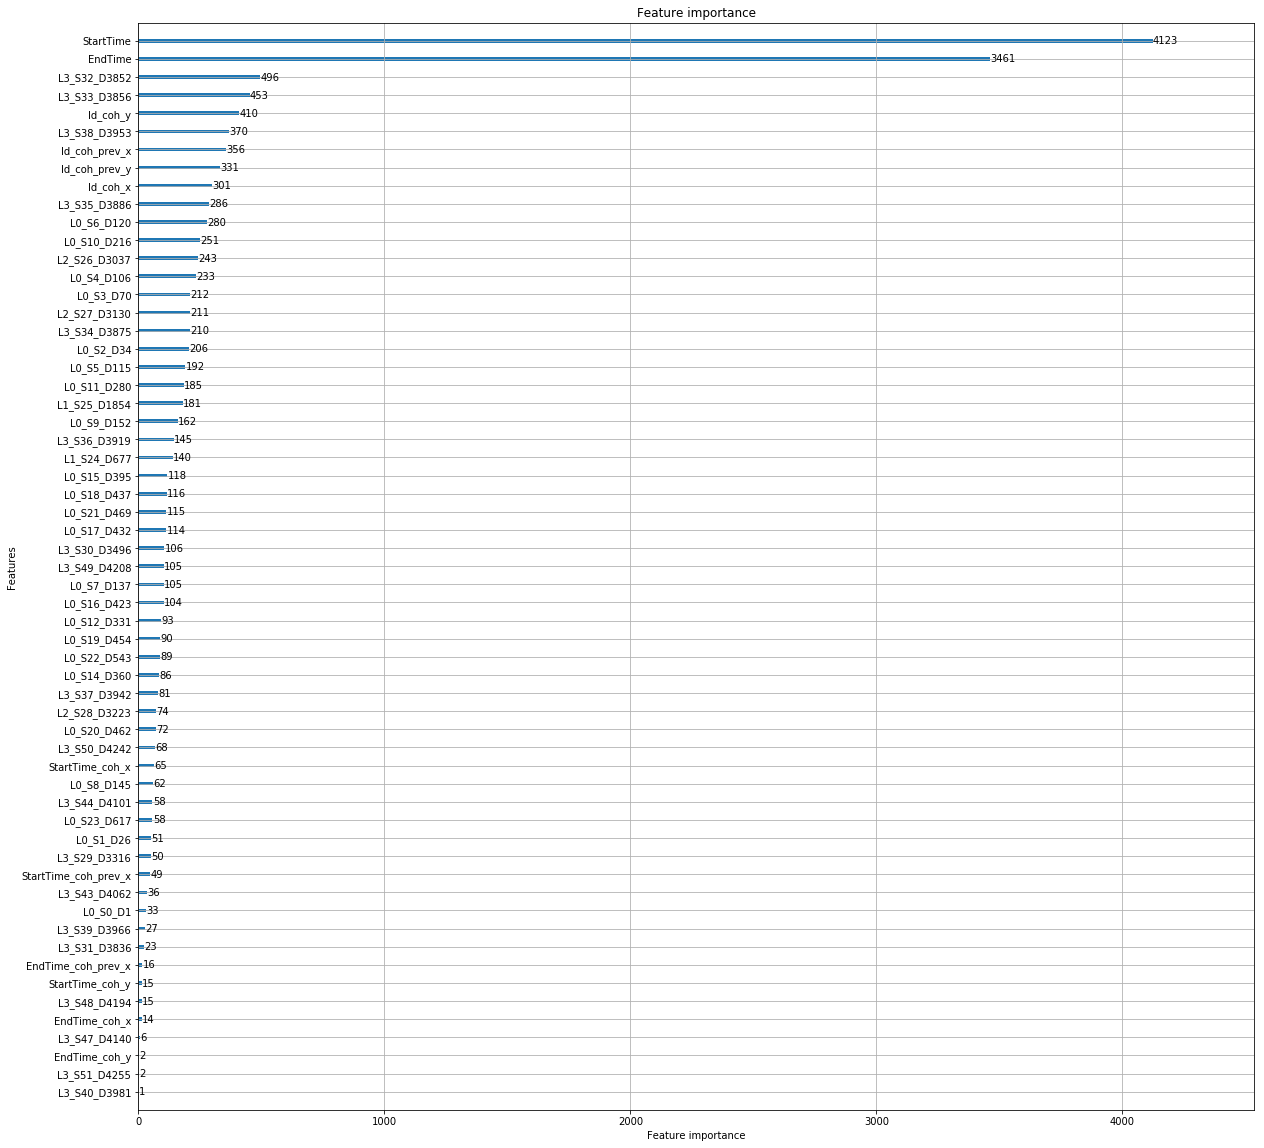

In [32]:
lgb.plot_importance(model, max_num_features=100, figsize=(20,20))

C:\Users\Tomonobu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.369837
best_threshold: 0.320000
Wall time: 1min 44s


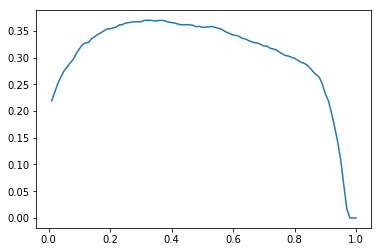

In [33]:
%%time
plt.figure()
thresholds = np.linspace(0.01, 1.00, 100)
mcc = np.array([metrics.matthews_corrcoef(y, preds_oof>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print("MCC: %f" % mcc.max())
print("best_threshold: %f" % best_threshold)

In [34]:
preds = (preds_test.mean(axis=0) > best_threshold).astype(np.int8)
sub = pd.read_csv("../../data/sample_submission.csv", index_col=0)
sub["Response"] = preds
sub.to_csv("../../submission/submit_20180717_1.csv")

C:\Users\Tomonobu\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
